<h1>Статистический анализ данных сервиса GoFast<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Загрузка-данных" data-toc-modified-id="Шаг-1.-Загрузка-данных-1">Шаг 1. Загрузка данных</a></span></li><li><span><a href="#Шаг-2.-Предобработка-данных" data-toc-modified-id="Шаг-2.-Предобработка-данных-2">Шаг 2. Предобработка данных</a></span></li><li><span><a href="#Шаг-3.-Исследовательский-анализ-данных" data-toc-modified-id="Шаг-3.-Исследовательский-анализ-данных-3">Шаг 3. Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#3.1-Частота-встречаемости-городов" data-toc-modified-id="3.1-Частота-встречаемости-городов-3.1">3.1 Частота встречаемости городов</a></span></li><li><span><a href="#3.2-Соотношение-пользователей-с-подпиской-и-без-подписки" data-toc-modified-id="3.2-Соотношение-пользователей-с-подпиской-и-без-подписки-3.2">3.2 Соотношение пользователей с подпиской и без подписки</a></span></li><li><span><a href="#3.3-Возраст-пользователей" data-toc-modified-id="3.3-Возраст-пользователей-3.3">3.3 Возраст пользователей</a></span></li><li><span><a href="#3.4-Расстояние,-которое-пользователь-преодолел-за-одну-поездку" data-toc-modified-id="3.4-Расстояние,-которое-пользователь-преодолел-за-одну-поездку-3.4">3.4 Расстояние, которое пользователь преодолел за одну поездку</a></span></li><li><span><a href="#3.5-Продолжительность-поездок" data-toc-modified-id="3.5-Продолжительность-поездок-3.5">3.5 Продолжительность поездок</a></span></li></ul></li><li><span><a href="#Шаг-4.-Объединение-данных" data-toc-modified-id="Шаг-4.-Объединение-данных-4">Шаг 4. Объединение данных</a></span></li><li><span><a href="#Шаг-5.-Подсчёт-выручки" data-toc-modified-id="Шаг-5.-Подсчёт-выручки-5">Шаг 5. Подсчёт выручки</a></span></li><li><span><a href="#Шаг-6.-Проверка-гипотез" data-toc-modified-id="Шаг-6.-Проверка-гипотез-6">Шаг 6. Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#6.1-Тратят-ли-пользователи-с-подпиской-больше-времени-на-поездки?" data-toc-modified-id="6.1-Тратят-ли-пользователи-с-подпиской-больше-времени-на-поездки?-6.1">6.1 Тратят ли пользователи с подпиской больше времени на поездки?</a></span></li><li><span><a href="#6.2-Превышает-ли-среднее-расстояние,-которое-проезжают-пользователи-с-подпиской-за-одну-поездку-оптимальные-3130-метров?" data-toc-modified-id="6.2-Превышает-ли-среднее-расстояние,-которое-проезжают-пользователи-с-подпиской-за-одну-поездку-оптимальные-3130-метров?-6.2">6.2 Превышает ли среднее расстояние, которое проезжают пользователи с подпиской за одну поездку оптимальные 3130 метров?</a></span></li><li><span><a href="#6.3-Будет-ли-помесячная-выручка-от-пользователей-с-подпиской-по-месяцам-выше,-чем-выручка-от-пользователей-без-подписки?" data-toc-modified-id="6.3-Будет-ли-помесячная-выручка-от-пользователей-с-подпиской-по-месяцам-выше,-чем-выручка-от-пользователей-без-подписки?-6.3">6.3 Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?</a></span></li><li><span><a href="#6.4" data-toc-modified-id="6.4-6.4">6.4</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7">Выводы</a></span></li></ul></div>

Анализ проведен на основе данных о поездках пользователей сервиса проката самокатов GoFast. Данные состоят из трех датафреймов: 
- сведения о пользователях (id пользователя, имя, возраст, город, тип подписки),
- сведения о совершенных поездках (id пользователя, расстояние, длительность поездки, дата),
- информация об условиях пользования сервисом с подпиской и без

Цель: исследование пользователей с подпиской и без, для дальнейшего улучшения сервиса и условий подписки.

### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
sub = pd.read_csv('/datasets/subscriptions_go.csv')

In [2]:
print(users.info())
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [3]:
print(rides.info())
rides.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [4]:
print(sub.info())
sub.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Мы имеем три датафрейма. Первый содержит информацию о пользователях, в нем 1565 строк и 5 колонок. Пропусков нет, типы данных исправлять не требуется. Второй датафрейм содержит информацию о поездках, в нем 18068 строк и 4 колонки. Пропусков нет, требуется изменить тип данных столбца с датами. Последний датафрейм содержит информацию о типах подписок, дополнительной предобработки не требует. Проведем предобработку и продолжим изучение.**

### Шаг 2. Предобработка данных

Изменим формат даты для упрощения дальнейшей работы

In [5]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

Добавим колонку с номером месяца поездки, для расчета выручки

In [6]:
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Проверим наличие пропусков и дубликатов

In [7]:
print(rides.isna().sum()) 
print(rides.duplicated().sum()) 
print(users.isna().sum()) 
users.duplicated().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64
0
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


31

In [8]:
users = users.drop_duplicates().reset_index(drop=True) 
users.duplicated().sum()

0

**В ходе предобработки был изменен формат даты, добавлен столбец с номером месяца и удалены дубликаты.**

### Шаг 3. Исследовательский анализ данных

#### 3.1 Частота встречаемости городов

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: user_id, dtype: int64


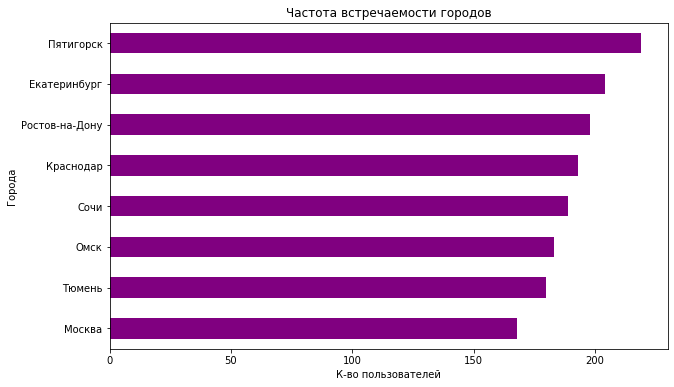

In [9]:
users_city = users.groupby('city')['user_id'].count()
print(users_city.sort_values(ascending = False))
users_city.sort_values().plot.barh(color = "purple", figsize = (10,6))
plt.title('Частота встречаемости городов')
plt.xlabel('К-во пользователей')
plt.ylabel('Города')
plt.show()

В данных содержаться сведения о поездках в 8 городах, колличество поездок распределенно более менее равномерно. Бельше всего сведений о поездках в Пятигорске, меньше всего - в Москве.

#### 3.2 Соотношение пользователей с подпиской и без подписки

free     835
ultra    699
Name: subscription_type, dtype: int64


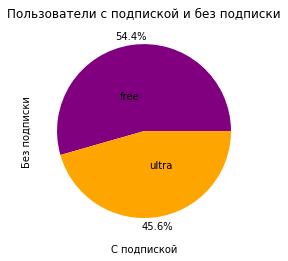

In [10]:
print(users['subscription_type'].value_counts())
users['subscription_type'].value_counts().plot(kind='pie', autopct='%1.1f%%',  colors=['purple', 'orange'], pctdistance=1.1, labeldistance=.4)
plt.title('Пользователи с подпиской и без подписки')
plt.xlabel('С подпиской')
plt.ylabel('Без подписки')
plt.show()

В предоставленных данных больше всего пользователей без подписки

#### 3.3 Возраст пользователей

In [11]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

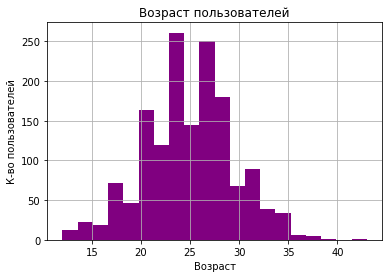

In [12]:
users['age'].hist(bins=20, color = "purple")
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('К-во пользователей')
plt.show()

По графику видно, что среди пользователей самая распространенная группа возрастом с 20 до 30 лет. В то время как представлены данные о пользователях с 12 до 43 лет.

#### 3.4 Расстояние, которое пользователь преодолел за одну поездку

In [13]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

       user_id  distance   duration       date  month
11555     1069  0.855683  10.001902 2021-01-31      1
9541       925  2.570787   3.011018 2021-10-19     10
13690     1223  4.329506   4.008958 2021-05-22      5
8658       861  6.784447   6.015656 2021-07-21      7
7841       796  7.097072  10.026614 2021-11-26     11


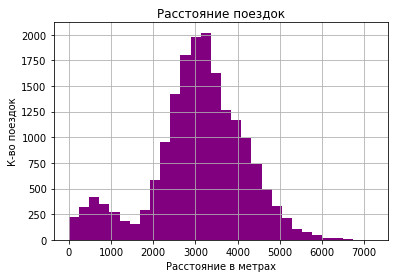

In [14]:
print(rides.sort_values('distance').head())
rides['distance'].hist(bins=30, color = "purple")
plt.title('Расстояние поездок')
plt.xlabel('Расстояние в метрах')
plt.ylabel('К-во поездок')
plt.show()

По графику мы видим два пика: малый с поездаками до 1000 м, и большой с поездками около 3000 м. Можно предположить, что первый связан с транспортной необходимостью (н-р: доехать до магазина или метро), а второй - с прогулочными поездками. 

#### 3.5 Продолжительность поездок

In [15]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

       user_id     distance  duration       date  month
12013     1102  4602.122401       0.5 2021-08-01      8
17314     1483  4445.481070       0.5 2021-03-06      3
15029     1318  5894.633314       0.5 2021-03-28      3
7437       766  4539.088310       0.5 2021-12-22     12
12967     1172  4907.140751       0.5 2021-12-19     12
      user_id     distance   duration       date  month
6453      694  4210.871467  38.265229 2021-03-11      3
1998      216  4831.339954  38.352763 2021-05-11      5
2623      278  4754.433686  39.526602 2021-12-02     12
4709      507  4645.642671  39.873856 2021-01-15      1
4215      454  5137.327103  40.823963 2021-12-27     12
17.80501119798444


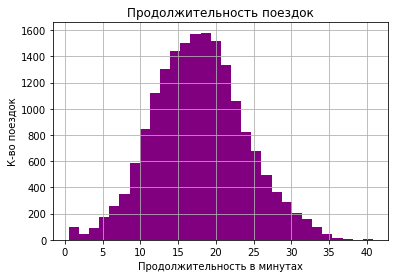

In [16]:
print(rides.sort_values('duration').head())
print(rides.sort_values('duration').tail())
print(rides['duration'].mean())
rides['duration'].hist(bins=30, color = "purple")
plt.title('Продолжительность поездок')
plt.xlabel('Продолжительность в минутах')
plt.ylabel('К-во поездок')
plt.show()

In [17]:
print(rides.query('duration <= 1').describe())
print(rides.query('29 <= duration <= 31').describe())
rides = rides.query('duration != 0.5')

           user_id     distance  duration      month
count    95.000000    95.000000      95.0  95.000000
mean   1092.210526  5113.176549       0.5   6.484211
std     244.028551   658.254104       0.0   3.709858
min     701.000000  4030.308008       0.5   1.000000
25%     901.000000  4611.510820       0.5   3.000000
50%    1069.000000  5052.769411       0.5   6.000000
75%    1310.500000  5488.459099       0.5  10.000000
max    1524.000000  7211.007745       0.5  12.000000
           user_id     distance    duration       month
count   361.000000   361.000000  361.000000  361.000000
mean    805.481994  4032.355853   29.931525    6.747922
std     445.398580   734.182078    0.572464    3.330024
min      10.000000  2674.706974   29.003878    1.000000
25%     408.000000  3446.270355   29.428166    4.000000
50%     850.000000  4003.156509   29.914517    7.000000
75%    1194.000000  4490.418170   30.384565    9.000000
max    1531.000000  6538.937375   30.995678   12.000000


В среднем поездки занимают 15-20 минут. 
Также при исследовании были обнаружены аномальные значения, где за пол минуты преодалевались расстояния в более чем 4000 м. Строки с этими данными были удалены, так как их количество незначительно, и удаление не повлияет на дальнейшее исследование. По небольшому сравнению видно, что за пол часа пользователи в среднем проезжают меньшее расстояние на 1 км, поэтому  исправление вызовет больше искажений, чем удаление. 

**В ходе исследовательского анализа данных были получены первые выводы:**  
**- города в данных представлены более менее равномерно,**  
**- в данных больше пользователей без подписки,**  
**- возраст большинства пользователей 20-30 лет**  
**- в среднем пользователи преодолевают около 3000 м,**  
**- средняя поездка занимает 15-20 минут**  

**Также были удалены аномальные значения**

### Шаг 4. Объединение данных

Объединим в две таблицы: с данными о пользователях и с данными о поездках в одну

In [18]:
data = rides.merge(users, on='user_id', how='left')
data = data.merge(sub, on='subscription_type', how='left')
data.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [19]:
print(data.info())
print(data.isna().sum()) 
data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 17972
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   distance           17973 non-null  float64       
 2   duration           17973 non-null  float64       
 3   date               17973 non-null  datetime64[ns]
 4   month              17973 non-null  int64         
 5   name               17973 non-null  object        
 6   age                17973 non-null  int64         
 7   city               17973 non-null  object        
 8   subscription_type  17973 non-null  object        
 9   minute_price       17973 non-null  int64         
 10  start_ride_price   17973 non-null  int64         
 11  subscription_fee   17973 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB
None
user_id              0
distance    

0

Объединение прошло успешно, количество строк соответствует количеству строк датафрема о поздках после удаления аномальных значений. Пропусков и дубликатов нет.

Выделим отдельно пользователей с подпиской

In [20]:
ultra = data.query('subscription_type == "ultra"')
print(ultra.info())
ultra.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   distance           6500 non-null   float64       
 2   duration           6500 non-null   float64       
 3   date               6500 non-null   datetime64[ns]
 4   month              6500 non-null   int64         
 5   name               6500 non-null   object        
 6   age                6500 non-null   int64         
 7   city               6500 non-null   object        
 8   subscription_type  6500 non-null   object        
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB
None


,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


Выделим отдельно пользователей без подписки

In [21]:
free = data.query('subscription_type == "free"')
print(free.info())
free.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11473 entries, 6500 to 17972
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11473 non-null  int64         
 1   distance           11473 non-null  float64       
 2   duration           11473 non-null  float64       
 3   date               11473 non-null  datetime64[ns]
 4   month              11473 non-null  int64         
 5   name               11473 non-null  object        
 6   age                11473 non-null  int64         
 7   city               11473 non-null  object        
 8   subscription_type  11473 non-null  object        
 9   minute_price       11473 non-null  int64         
 10  start_ride_price   11473 non-null  int64         
 11  subscription_fee   11473 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB
None


,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


Сравним длительность поездки у пользователей с подпиской и без

In [22]:
print(free['duration'].describe())
ultra['duration'].describe()

count    11473.000000
mean        17.530771
std          6.162609
min          2.035632
25%         13.085688
50%         17.383807
75%         21.638038
max         34.948498
Name: duration, dtype: float64


count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

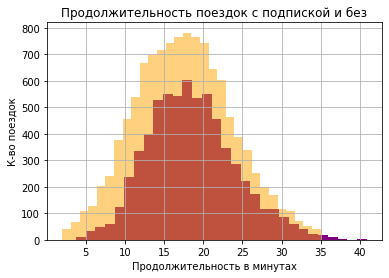

In [23]:
ultra['duration'].hist(bins=30, color = "purple", label='с подпиской')
free['duration'].hist(bins=30, color = "orange", label='без подписки', alpha=0.5)
plt.title('Продолжительность поездок с подпиской и без')
plt.xlabel('Продолжительность в минутах')
plt.ylabel('К-во поездок')
plt.show()

В среднем поездка у пользователей с подпиской или без занимает 15-20 минут. 

Сравним расстояние преодоленное за поездки у пользователей с подпиской и без

In [24]:
print(free['distance'].describe())
ultra['distance'].describe()

count    11473.000000
mean      3028.374239
std       1235.541051
min          0.855683
25%       2360.878149
50%       3102.083025
75%       3883.979311
max       7066.003772
Name: distance, dtype: float64


count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

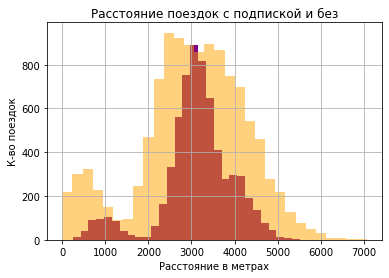

In [25]:
ultra['distance'].hist(bins=30, color = "purple", label = 'с подпиской')
free['distance'].hist(bins=30, color = "orange", label = 'без подписки', alpha=0.5)
plt.title('Расстояние поездок с подпиской и без')
plt.xlabel('Расстояние в метрах')
plt.ylabel('К-во поездок')
plt.show()

**В ходе этого шага мы объединили данные в одну таблицу, а также изучили две категории пользователей с подпиской и без по разным критериям. Время поездки у обоих категорий примерно равно 15-20 минут, среднее расстояние - 3100 м.  По графикам мы также можем заметить, что пользователи без подписки совершают бо́льшее количество поездок в целом, с чем и связан бо́льший разброс диапазона расстояния поездок на графике.**

### Шаг 5. Подсчёт выручки

In [26]:
data['duration'] = np.ceil(data['duration'])
data['duration'] = data['duration'].astype('int')
data_r = data.pivot_table(index=['user_id', 'month', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee'], values=['distance', 'duration'], aggfunc=['count', 'sum'])
data_r.columns = ['cd', 'count', 'distance', 'duration']
data_r = data_r.drop(columns = ['cd']).reset_index()
data_r.head()

count  \
                                                                               distance   
user_id month subscription_type minute_price start_ride_price subscription_fee            
1       1     ultra             6            0                199                     2   
        4     ultra             6            0                199                     1   
        8     ultra             6            0                199                     2   
        10    ultra             6            0                199                     2   
        11    ultra             6            0                199                     3   

                                                                                         \
                                                                               duration   
user_id month subscription_type minute_price start_ride_price subscription_fee            
1       1     ultra             6            0                199                     2   
        4     ultra             6            0                199                     1   
        8     ultra             6            0                199                     2   
        10    ultra             6            0                199                     2   
        11    ultra             6            0                199                     3   

                                                                                        sum  \
                                                                                   distance   
user_id month subscription_type minute_price start_ride_price subscription_fee                
1       1     ultra             6            0                199               7027.511294   
        4     ultra             6            0                199                754.159807   
        8     ultra             6            0                199               6723.470560   
        10    ultra             6            0                199               5809.911100   
        11    ultra             6            0                199               7003.499363   

                                                                                         
                                                                               duration  
user_id month subscription_type minute_price start_ride_price subscription_fee           
1       1     ultra             6            0                199                    42  
        4     ultra             6            0                199                     7  
        8     ultra             6            0                199                    46  
        10    ultra             6            0                199                    32  
        11    ultra             6            0                199                    56

In [27]:
data_r['revenue'] = (
    data_r['start_ride_price'] * data_r['count'] + 
    data_r['minute_price'] * data_r['duration'] + 
    data_r['subscription_fee']
)
data_r.head()

KeyError: 'start_ride_price'

In [ ]:
revenue = data_r.pivot_table(index='subscription_type', values='revenue', aggfunc=['count', 'mean','sum'])
print(revenue)
data_r.groupby('subscription_type')['revenue'].hist()
plt.title('Доход от поездок с подпиской и без')
plt.xlabel('Доход')
plt.ylabel('К-во поездок')
plt.show()

**Подсчет выручки показал, что в целом больший доход приносят пользователи без подписки, так как их большинство. Но в среднем пользователь с подпиской приносит больше дохода.**

### Шаг 6. Проверка гипотез

#### 6.1 Тратят ли пользователи с подпиской больше времени на поездки?
**Нулевая гипотеза Н0:** среднее время поездки равно для обоих категорий подписок  
**Альтернативная гипотеза Н1:** пользователи с подпиской больше времени на поездки, чем пользователи без подписки

In [ ]:
alpha = 0.05 
results = st.ttest_ind(ultra['duration'], free['duration'], alternative='greater')
print('p-значение:', results.pvalue)
print(ultra['duration'].mean())
print(free['duration'].mean())
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

**Вывод:** есть основания утверждать, что пользователи с подпиской тратят больше времени на поездки.

#### 6.2 Превышает ли среднее расстояние, которое проезжают пользователи с подпиской за одну поездку оптимальные 3130 метров?
Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката.  
**Нулевая гипотеза Н0:** среднее расстояние поездки пользователя с подпиской равно 3130 метров  
**Альтернативная гипотеза Н1:** среднее расстояние поездки пользователя с подпиской более 3130 метров

In [ ]:
interested_value = 3130 
alpha = 0.05

results = st.ttest_1samp(
   ultra['distance'], 
   interested_value,
   alternative='greater') 

print('p-значение:', results.pvalue)
print(ultra['distance'].mean())
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

**Вывод:** среднее расстояние поездки пользователя с подпиской не превышает оптимальные 3130 метров.

#### 6.3 Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?  
**Нулевая гипотеза Н0:** помесячная выручка от пользователей с подпиской и без равны.    
**Альтернативная гипотеза Н1:** помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [ ]:
ultra_r = data_r.query('subscription_type == "ultra"')
free_r = data_r.query('subscription_type == "free"')
alpha = 0.05 
results = st.ttest_ind(ultra_r['revenue'], free_r['revenue'], alternative='greater')
print('p-значение:', results.pvalue)
print(ultra_r['revenue'].mean())
print(free_r['revenue'].mean())
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

**Вывод:** помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

#### 6.4 
Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Данный файл предоставлен не был. Для проверки этой гипотезы будет проведен тест для проверки равенства средних для зависимых (парных) выборок: *scipy.stats.ttest_rel()*. А именно, проверится правосторонняя альтернативная гипотеза,  как только предоставят данные.

### Выводы  
В ходе исследования были изучены данные сервиса проката самокатов GoFast о пользователях и их поездках. Были сделаны следующие выводы:  
- пользователей без подписки больше чем с ней;
- большинство пользователей сервиса возрастом с 20 до 30 лет;
- среднее растояние одной поездки примерно 3100 м;
- среднее время поездки 15-20 минут;
- больше всего поездок совершают пользователи без подписки;  

Подсчет выручки показал, что в целом больший доход приносят пользователи без подписки, так как их большинство. Но в среднем пользователь с подпиской приносит больше дохода. 

По результатам проверки гипотез сделаны выводы:
- есть основания утверждать, что пользователи с подпиской тратят больше времени на поездки;  
- среднее расстояние поездки пользователя с подпиской не превышает оптимальные 3130 метров; 
- помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Исследование показало, что обе группы пользователей важны. Стоит учитывать интересы каждой из них при изменениях в работе сервиса.